### Table of Contents 

#### [1. Importing Libraries](#1)
#### [2. Feature Importance](#2)
#### [3. Support Vector Machine](#3)
#### [4. Random Forest Classifier](#4)
#### [5. Model Evaluation](#5)

### Building Our Model

### Importing Libraries<a id=1></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

### Reading Preprocessed Data

In [2]:
df = pd.read_csv("preprocessed.csv")

In [3]:
df.head()

,Unnamed: 0,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,0,5,1,1,1,2,1,3,1,1,2
1,1,5,4,4,5,7,10,3,2,1,2
2,2,3,1,1,1,2,2,3,1,1,2
3,3,6,8,8,1,3,4,3,7,1,2
4,4,4,1,1,3,2,1,3,1,1,2


In [4]:
df.drop("Unnamed: 0",axis=1) ## Dropping Columns

,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


#### Train-Test Split

In [5]:
X = df.drop("class",axis=1)  ## Features 
y = df["class"]              # Target

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

###  Feature Importance<a id=2></a>

In [7]:
fs = SelectKBest(score_func=f_regression, k=5)

In [8]:
X_selected  = fs.fit_transform(X_train,y_train)

In [9]:
dfscores = pd.DataFrame(fs.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
fs.scores_


array([  20.9972662 ,  494.49024704,  985.62788529, 1012.23648456,
        462.61923028,  429.36740089,  991.42947844,  648.88929384,
        499.01142904,   99.64849568])

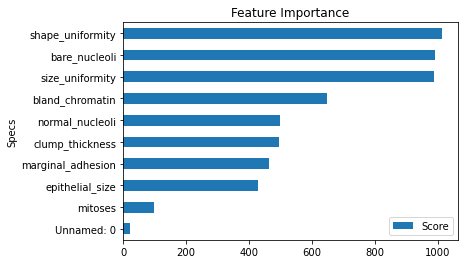

In [10]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores= featureScores.set_index("Specs").sort_values(by="Score")
featureScores.plot(kind="barh",title="Feature Importance")
plt.show()

### Support Vector Machine<a id=3></a>

In [11]:
from sklearn.svm import SVC  # import SVC

In [12]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [13]:
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)

In [14]:
grid_svc.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [15]:
grid_svc.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [16]:
grid_svc_pred = grid_svc.predict(X_test)

In [17]:
print("Accuracy Score is :",round((accuracy_score(y_test,grid_svc_pred)*100),2),"%")

Accuracy Score is : 95.71 %


### Random Forest Classifier<a id=4></a>

In [18]:
rf = RandomForestClassifier()

#### HyperParameter Tuning

In [19]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [20]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [21]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [22]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [29]:
rf_pred = rf_random.predict(X_test)

In [30]:
print("Accuracy Score is :",round((accuracy_score(y_test,rf_pred)*100),2),"%")

Accuracy Score is : 98.1 %


## Model Evaluation<a id=5></a>

In [31]:
print("SVC Classification Report")

print("..."*35)

print(classification_report(y_test,grid_svc_pred))

SVC Classification Report
.........................................................................................................
              precision    recall  f1-score   support

           2       0.96      0.98      0.97       137
           4       0.96      0.92      0.94        73

    accuracy                           0.96       210
   macro avg       0.96      0.95      0.95       210
weighted avg       0.96      0.96      0.96       210



In [32]:
print("Random Forest Classification Report")

print("..."*35)

print(classification_report(y_test,rf_pred))

Random Forest Classification Report
.........................................................................................................
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       137
           4       0.97      0.97      0.97        73

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



### Confusion Metrics

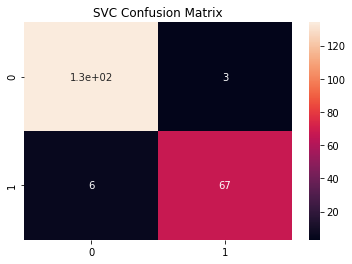

In [33]:
sns.heatmap(confusion_matrix(y_test,grid_svc_pred),annot = True)
plt.title("SVC Confusion Matrix")
plt.show()

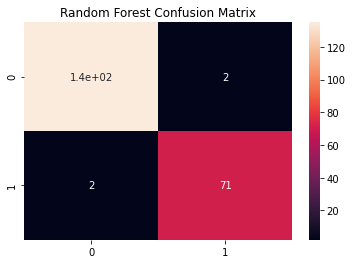

In [34]:
sns.heatmap(confusion_matrix(y_test,rf_pred),annot = True)
plt.title("Random Forest Confusion Matrix")
plt.show()

### Conclusion

- After getting the data , We first split our data to evaluate model performance. 
- For this project two different model has been choosen.
- Before fit our model into the data, data has been tuned using GridSearch and Randomized Search.
- As result, **Support Vector Machine** performed 96% accuracy,**Random Forest** has a performace 98%

#### For further prediction, Random forest can be used as a main model for classification problem.

*Thank you*